** UDACITY **

** Nabodegree Analista de Dados **

### Projeto: Investigate a Dataset

# Analisando os dados do TITANIC

**por Fábio Corrêa Cordeiro**

Este projeto tem como objetivo analisar a base de dados titanic_data.csv que contém informações de 891 passageiros do Titanic. A base foi obtida no site [Kaggle](https://www.kaggle.com/c/titanic/data). Neste trabalho queremos avaliar se o princípio de que mulheres e crianças têm preferências nos salvamentos de um naufrágio foi respeitado no caso do famoso naufrágio do Titanic.

## Pergunta:
A pergunta que será respondida nessa análise é se a prática de salvar mulheres e crianças primeiro foi respeitada no naufrágio do Titanic. Para tal iremos verificar se a quantidade de mulheres e crianças que sobreviverem ao naufrágio é estatisticamente mais maior do que de homens. 

## Etapa 1 - Aquisição dos dados
Nessa estapa é importado os dados do arquivo titanic_data.csv

In [160]:
import numpy as np
import pandas as pd
import unicodecsv
import matplotlib.pyplot as plt
from scipy import stats

"""" Reading data """
titanic_data_csv = 'titanic_data.csv'
titanic_data_bruto = pd.read_csv(titanic_data_csv)
titanic_data_bruto.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Etapa 2 - Limpeza da base de dados
Após verificar o arquivo titanic_data.csv encontramos os seguintes erros que deverão ser consertados antes de iniciar a análise de dados propriamente dita:

* Como os dados das colunas Ticket, Fare, Cabin e Embarked não são necessários para responder a pergunta levantada, iremos excluí-los da nossa lista titanic_data.

In [161]:
"""Selecting only relevant coluns """
titanic_data = titanic_data_bruto[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch']]

Agora vamos analisar quantos se todos os passageiros tem informações sobre idade e gênero.

In [162]:
""" Printin information about 'Sex' and 'Age'. """
print 'Total: ',len(titanic_data)
print 'Passageiros com informação de idade: ', len(titanic_data[titanic_data['Age'] > 0])
print 'Passageiros com informação de gênero: ', len(titanic_data[(titanic_data['Sex'] == 'male')|
                                                                 (titanic_data['Sex'] == 'female')])

Total:  891
Passageiros com informação de idade:  714
Passageiros com informação de gênero:  891


* Iremos duplicar as bases de dados. A base para análise entre homens e mulheres terá 891 passageiros, na base para a comparação entre adultos e crianças serão mantidas apenas as 714 linhas que possuem informações sobre idade.

In [163]:
""" Duplicate the data set, one to 'Age' comparison and other to 'Sex'. """
titanic_data_age = titanic_data[titanic_data['Age'] > 0]
titanic_data_sex = titanic_data[(titanic_data['Sex'] == 'male')|(titanic_data['Sex'] == 'female')]

Como iremos analisar a diferença entre crianças e adultos, iremos criar uma categoria classificando cada passageiro. Nesse caso iremos considerar crianças todos aqueles indivíduos com 14 anos ou menos.

In [164]:
""" Adding 'grupo_idade' column on 'titanic_data_age'. """
titanic_data_age['grupo_idade'] = pd.cut(titanic_data_age['Age'], [0, 14, 150], labels=["crianca", "adulto"])
titanic_data_age.head()

C:\Users\fabio\Anaconda3\envs\machinelearn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,grupo_idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,adulto


## Etapa 3 - Análise dos dados
Nesta etapa iremos analisar se houve diferenças estatisticamente significantes para o número de sobreviventes Homens, Mulheres e Crianças. 

Para isso vamos criar uma função que separa qualquer uma das colunas da tabela "titanic_data_age" em duas e agrupa os dados pela idade. Essa função irá nos ajudar a montar os gráficos 

In [165]:
def plt_graph1(feature, parameter):
    
    """"
    For a column of titanic_data_age the plt_graph1 do:
    - split the column in feature == parameter and feature == parameter;
    - then group the both data by 'Age'
    Return the column splited
    """
    
    feature_parameter = titanic_data_age[titanic_data_age[feature] == parameter]
    feature_parameter = feature_parameter.groupby(['Age']).size()
    feature_not_parameter = titanic_data_age[titanic_data_age[feature] != parameter]
    feature_not_parameter = feature_not_parameter.groupby(['Age']).size()
    return(feature_parameter, feature_not_parameter)

Primeiramente vamos analisar como se dá a distribuição dos sobreviventes de acordo com a idade.

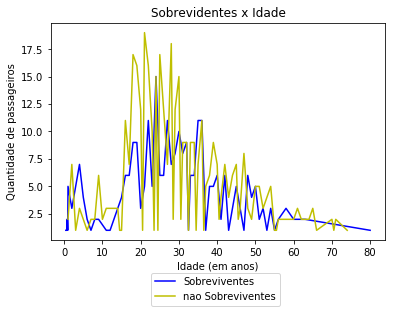

In [166]:
survived, not_survived = plt_graph1('Survived', 1)

plt.plot(survived, color = 'b', label = 'Sobreviventes')
plt.plot(not_survived, color = 'y', label = 'nao Sobreviventes')
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=2, borderaxespad=0.)
plt.title('Sobrevidentes x Idade')
plt.xlabel('Idade (em anos)')
plt.ylabel('Quantidade de passageiros')
plt.show()  

No geral houve menos sobreviventes do que fatalidades, mas com uma discrepância maior entre as idades de 15 a 30 anos

Agora a distribuição do gênero de acordo com a idade

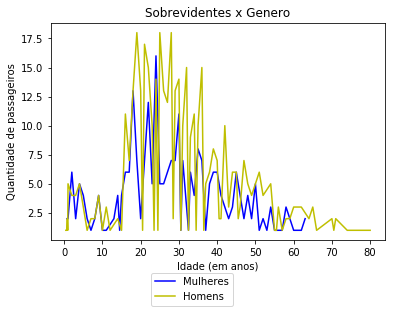

In [167]:
female, male = plt_graph1('Sex', 'female')

plt.plot(female, color = 'b', label = 'Mulheres')
plt.plot(male, color = 'y', label = 'Homens')
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=2, borderaxespad=0.)
plt.title('Sobrevidentes x Genero')
plt.xlabel('Idade (em anos)')
plt.ylabel('Quantidade de passageiros')
plt.show()

Podemos verificar que há mais homens do que mulheres, mas essa diferença não parece ser relevantes quando olhamos apenas para os dados das crianças.

Iremos fazer duas comparações, uma entre homens e mulheres, não importando a idade, e outra entre adultos e crianças.

In [168]:
def plt_graph2(data, feature):
    """"
    For one of two data ("titanic_data_sex" or "titanic_data_age"), 
    the dataframe is grouped by column "feature" and by "Survived".
    plt_graph2 return bar_1 and bar_2:
    bar_1 = feature[0] not survived and feature[1] not survived
    bar_2 = feature[0] survived and feature[1] survived
    """
    feature_survived = data.groupby([feature,'Survived']).size()
    feature_p0_notsurvived = feature_survived[0]
    feature_p0_survived= feature_survived[1]
    feature_p1_notsurvived= feature_survived[2]
    feature_p1_survived= feature_survived[3]
    bar_1 = [feature_p0_notsurvived,feature_p1_notsurvived]
    bar_2 = [feature_p0_survived,feature_p1_survived]
    return bar_1, bar_2    

Segue abaixo a comparação entre homens e mulheres:

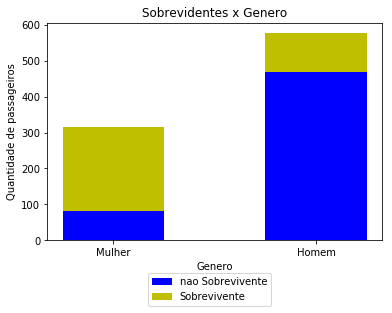

In [169]:
bar_1, bar_2 = plt_graph2(titanic_data_sex, 'Sex')
x_pos = np.arange(len(bar_1))
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b', label = 'nao Sobrevivente')
second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', label = 'Sobrevivente', bottom=bar_1)
plt.xticks(x_pos, ('Mulher','Homem'))
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=2, borderaxespad=0.)
plt.title('Sobrevidentes x Genero')
plt.xlabel('Genero')
plt.ylabel('Quantidade de passageiros')

plt.show()

Segue abaixo a comparação entre adultos e crianças:

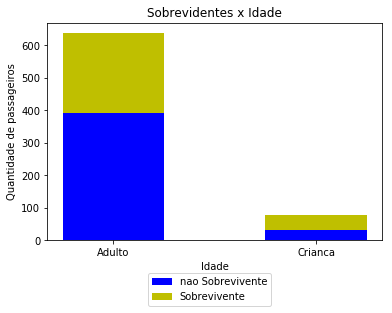

In [170]:
bar_1, bar_2 = plt_graph2(titanic_data_age, 'grupo_idade')
x_pos = np.arange(len(bar_1))
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b', label = 'nao Sobrevivente')
second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', label = 'Sobrevivente', bottom=bar_1)
plt.xticks(x_pos, ('Adulto','Crianca'))
plt.legend(bbox_to_anchor=(0.3, -0.15), loc=2, borderaxespad=0.)
plt.title('Sobrevidentes x Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de passageiros')
plt.show()

Agora vamos fazer os testes de inferência estatística para verificar se a diferença da proporção de sobreviventes e mortos são significativas. Usaremos a distribuição t de student para compararmos as duas amostras.

Primeiramente iremos anunciar a Hipótese nula (Ho) sendo que a proporção de homens sobreviventes é igual a proporção de mulheres sobreviventes. E da mesma maneira que proporção de adultos sobreviventes é igual a proporção de crianças sobreviventes. 

In [171]:
""" T Statistic beteween 'female survived' and 'male survived'. """
female_survived = titanic_data_sex[titanic_data_sex['Sex']=='female']['Survived']
male_survived = titanic_data_sex[titanic_data_sex['Sex']=='male']['Survived']
stats.ttest_ind(female_survived,male_survived)

Ttest_indResult(statistic=19.297816550123351, pvalue=1.4060661308802594e-69)

In [172]:
""" T Statistic beteween 'child survived' and 'adult survived'. """
child_survived = titanic_data_age[titanic_data_age['grupo_idade']=='crianca']['Survived']
adult_survived = titanic_data_age[titanic_data_age['grupo_idade']=='adulto']['Survived']
stats.ttest_ind(child_survived,adult_survived)

Ttest_indResult(statistic=3.3943357223469741, pvalue=0.00072607813944173139)

# Conclusão

Para confirmarmos as hipóteses nulas (Ho) de que a proporção de sobreviventes foram iguais deveríamos encontrar valores de p acima de 0,05. Como os valores foram bem abaixo rejeitamos as hipóteses nula. Portanto podemos constatar, com base na amostra analisada, que a morte de mulheres e crianças foram estatiticamente inferior à de homens e adultos no naufrágio do Titanic.

No entanto, como está faltando informações de aproximadamente 400 passageiros, ainda ficamos com algumas questões em abertos. Caso haja algum viés nos dados ausente (todos sejam de mulheres ou criancas que não sobreviveram, por exemplo) poderíamos chegar em conclusões diverentes da análise aqui realizada.

Uma continuidade possível para essa análise é verificar se mulheres e crianças tiveram a mesma chance de sobreviver considerando o quanto elas pagaram pela passagem. Ou mesmo se mulheres e crianças que pagaram tarifas baixas tiveram mais chance de sobreviver do que homens que pagaram tarifas mais caras.